# Network from a Text

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Ignore articles, pronouns, etc.
stop_words = set([
    'the', 'of', 'and', 'i', 'to', 'my', 'in', 'was', 'that', 'thy',
    'a', 'had', 'my', 'with', 'but', 'he', 'she', 'you', 'your',
    'me', 'not', 'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'chapter', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'am', 'even', 'its', 'did', 'then',
    'abbey', 'tintern', 'wordsworth', 'letter', 'thee', 'thou', 'oh',
    'into', 'any', 'myself', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about']
    + [str(x) for x in range(24)])

In [3]:
# This example uses regular expressions from the package re
import re
import itertools


# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create a list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            # increment the count for each word and store it in the 'count' property of nodes
            ### BEGIN SOLUTION
            G.add_node(v)
            G.nodes[v]['count'] = G.nodes[v].get('count',0) + 1
            ### END SOLUTION
        for v,u in itertools.combinations(words,2):
            # increment count for each pair of words in the sentences
            ### BEGIN SOLUTION
            if v == u or v in stop_words or u in stop_words:
                continue
            # Skip blank space
            if len(v) == 0 or len(u) == 0:
                continue
            # Add one to the edge's count
            if not G.has_edge(v,u):
                G.add_edge(v,u,count=0)
            G.edges[v, u]['count'] += 1
            ### END SOLUTION

    return G

In [4]:
# Read the text
from pathlib import Path
data_dir = Path('.') / 'data'

with open(data_dir / 'frankenstein.txt', encoding='utf-8') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

In [5]:
k = 10
# print k edges with the highest count
for edges in sorted(G.edges(data=True), key=lambda x: x[2]['count'], reverse=True)[:k]:
    print(edges)

('man', 'old', {'count': 34})
('country', 'native', {'count': 19})
('first', 'now', {'count': 16})
('death', 'life', {'count': 16})
('human', 'being', {'count': 16})
('natural', 'philosophy', {'count': 16})
('eyes', 'tears', {'count': 15})
('first', 'eyes', {'count': 14})
('some', 'time', {'count': 14})
('night', 'during', {'count': 14})


(-0.1, 0.1)

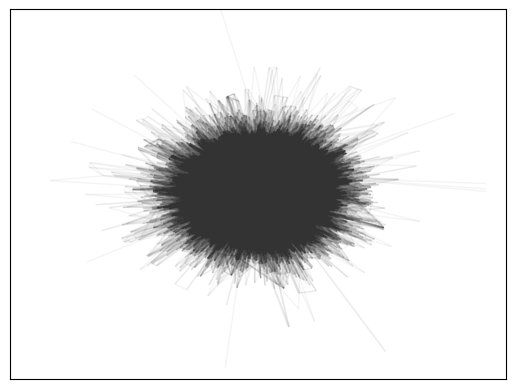

In [6]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0)
nx.draw_networkx_edges(
    G, pos, edge_color="#333333", alpha=0.05)
# Zoom in for a better view
plt.xlim([-0.1,0.1]); plt.ylim([-0.1, 0.1])

In [7]:
# Count co-occurrences for characters only
characters = [
    'creature', 'monster', 'victor', 'elizabeth',
    'william', 'henry', 'justine']

combinations = itertools.combinations(characters, 2)
counts = [(x, y, G[x][y]['count']) for x, y in combinations if G.has_edge(x, y)]
#print(counts)
counts = sorted(counts, key=lambda x: x[2], reverse=True)
for x, y, c in counts:
    print(x, y, c)

william justine 9
victor elizabeth 5
victor william 4
elizabeth william 3
elizabeth justine 3
creature justine 2
monster henry 2
monster elizabeth 1
victor justine 1
elizabeth henry 1


{('henry', 'monster'): Text(-0.044705505910772506, 0.7475740335657268, '2'),
 ('henry', 'elizabeth'): Text(0.05141951814796413, 0.48811639847726934, '1'),
 ('creature', 'justine'): Text(0.07934687415065551, -0.7179516856608746, '2'),
 ('william', 'victor'): Text(-0.020319608058185792, -0.14115611258910626, '4'),
 ('william', 'elizabeth'): Text(0.07630353928976731, 0.05046846280377525, '3'),
 ('william', 'justine'): Text(0.10574326571281262, -0.2790169875413534, '9'),
 ('elizabeth', 'victor'): Text(-0.12526666771134762, 0.03144295397562645, '5'),
 ('elizabeth',
  'justine'): Text(0.000796206059650785, -0.10641792097662069, '3'),
 ('elizabeth',
  'monster'): Text(-0.12476854442213116, 0.48252516445696547, '1'),
 ('victor', 'justine'): Text(-0.09582694128830231, -0.2980424963695022, '1')}

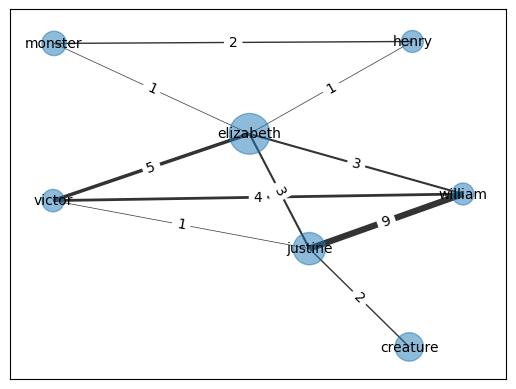

In [17]:
subG = G.subgraph(characters)
pos = nx.spring_layout(subG)
edge_width = [subG[x][y]['count'] / 2 for x, y in subG.edges()]
node_size = [subG.nodes[v]['count'] * 10 for v in subG]
nx.draw_networkx_nodes(subG, pos, alpha=0.5, node_size=node_size)
nx.draw_networkx_edges(subG, pos, width=edge_width, edge_color="#333333")
nx.draw_networkx_labels(subG, pos, font_size=10)
edge_labels = nx.get_edge_attributes(subG, 'count')
nx.draw_networkx_edge_labels(subG, pos, font_size=10, edge_labels=edge_labels)


{('henry', 'monster'): Text(0.9265731268966005, -0.5299470403043949, '2'),
 ('henry', 'elizabeth'): Text(0.4542036488898933, -0.6158238559670908, '1'),
 ('william', 'victor'): Text(-0.899324496696392, 0.37582511812396396, '4'),
 ('william',
  'elizabeth'): Text(-0.49969884761878003, -0.11041440122743959, '3'),
 ('william', 'justine'): Text(-0.5045067682044299, 0.27535523288717284, '9'),
 ('elizabeth', 'victor'): Text(-0.42206635869217096, 0.2545918074172221, '5'),
 ('elizabeth',
  'justine'): Text(-0.027248630200208797, 0.15412192218043097, '3'),
 ('elizabeth',
  'monster'): Text(0.44992876839214824, -0.14577089627148557, '1'),
 ('monster', 'justine'): Text(0.44512084780649847, 0.23999873784312686, '3.0'),
 ('victor', 'justine'): Text(-0.42687427927782073, 0.6403614415318345, '1')}

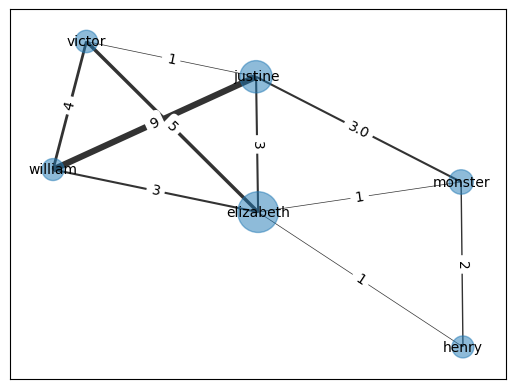

In [20]:
#same but fusion monster and creature nodes
test_subg = subG.copy()
#test_subg.add_edge('monster', 'justine', count = 1)
contracted_test_subg = nx.contracted_nodes(test_subg, 'monster', 'creature', self_loops=False, copy=True)
#sum original counts
for x, y in contracted_test_subg.edges():
    if x == 'monster' and test_subg.has_edge('creature', y):
        contracted_test_subg[x][y]['count'] += test_subg['creature'][y]['count'] / 2
pos = nx.spring_layout(contracted_test_subg)
edge_width = [contracted_test_subg[x][y]['count'] / 2 for x, y in contracted_test_subg.edges()]
node_size = [contracted_test_subg.nodes[v]['count'] * 10 for v in contracted_test_subg]
nx.draw_networkx_nodes(contracted_test_subg, pos, alpha=0.5, node_size=node_size)
nx.draw_networkx_edges(contracted_test_subg, pos, width=edge_width, edge_color="#333333")
nx.draw_networkx_labels(contracted_test_subg, pos, font_size=10)
edge_labels = nx.get_edge_attributes(contracted_test_subg, 'count')
nx.draw_networkx_edge_labels(contracted_test_subg, pos, font_size=10, edge_labels=edge_labels)


(-0.1, 0.1)

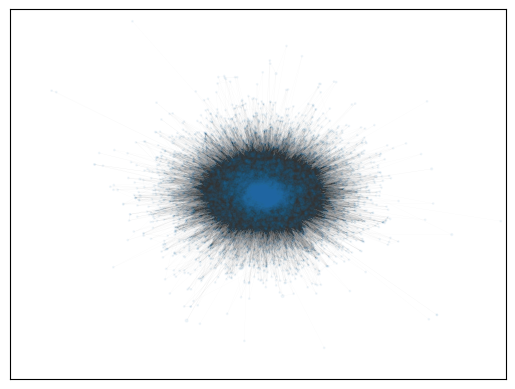

In [10]:
# plot the resulting graph with wider edges for higher count of co-occurence
edge_width = [0.1 * G[x][y]['count'] for x, y in G.edges()]
nodes_size = [G.nodes[v]['count'] for v in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0.05, node_size=nodes_size)
nx.draw_networkx_edges(
    G, pos, edge_color="#333333", alpha=0.05, width=edge_width)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af3654ad-45b5-4d49-97ec-f523df8e0fbf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>